## Credit Risk Modelling: Lending Club Dataset (Kaggle)

For this project, publicly available data from https://www.kaggle.com/wendykan/lending-club-loan-data has been explored. Lending Club connects people who need money (borrowers) with people who have money (investors). As an investor you would want to invest in people who showed a profile of having a high probability of paying you back. Multiple Machine learning algorithms have been applied to do so.

# Libaries Import

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data file

In [2]:
loans = pd.read_excel('LCloanbook.xls')
data = loans.drop('loan_status_CO_or_Default_or_Late',axis=1)
target = loans['loan_status_CO_or_Default_or_Late']

** Get info on the data set **

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61176 entries, 0 to 61175
Columns: 124 entries, loan_status_CO_or_Default_or_Late to verification_status_joint_Verified
dtypes: float64(10), int64(114)
memory usage: 57.9 MB


In [4]:
loans.head()

,loan_status_CO_or_Default_or_Late,loan_amnt,num_cars,num_inv,term,int_rate,installment,emp_length,annual_inc,dti,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,home_rooms,shopping_at_waitrose,shopping_at_tesco,verification_status_joint_Verified
0,1,9000,4,96,48,15.96,786.780767,4,78000.0,5.89,...,0,0,1,0,0,1,1,0,1,0
1,1,15000,2,44,18,20.89,1180.399190,5,92000.0,22.34,...,1,1,1,0,0,1,2,0,0,0
2,1,10800,0,62,18,14.47,715.650730,9,106000.0,11.37,...,1,0,0,0,1,1,0,0,0,0
3,1,8000,0,26,18,16.55,742.126395,10,38000.0,36.39,...,1,1,0,0,0,1,0,1,1,0
4,1,15000,0,52,36,13.66,1150.621201,8,43500.0,15.14,...,1,0,1,0,0,1,1,0,1,0


# Explanatory Analysis 

In [5]:
# Data Preparation
df_final = pd.DataFrame()

for num in range(0,7):
    grades_list = ['GRADE_A','GRADE_B','GRADE_C','GRADE_D','GRADE_E','GRADE_F','GRADE_G']
    df = loans[loans[grades_list[num]] == 1]
    df = df.rename(columns = {grades_list[num]:'GRADE'})
    df['GRADE'] = df['GRADE'].replace(1,grades_list[num])
    grades_list.remove(grades_list[num])
    df = df.drop(grades_list, axis = 1)
    df_final = pd.concat([df_final,df])

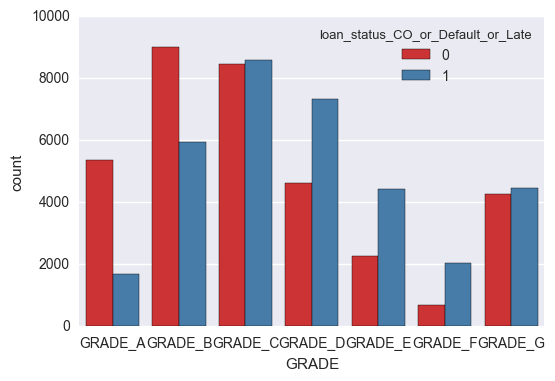

In [6]:
sns.countplot(x='GRADE',hue='loan_status_CO_or_Default_or_Late',data=df_final,palette='Set1')

/Users/karimkharchafi/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[(0, 500000)]

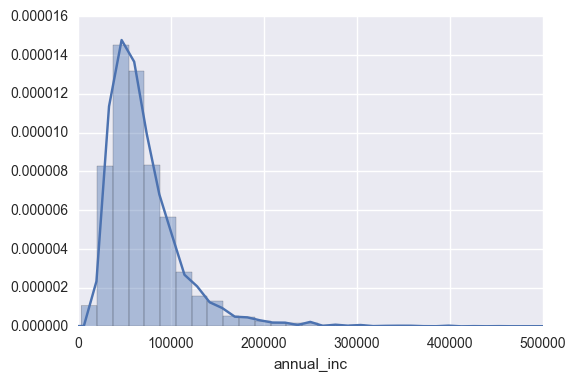

In [7]:
hst = sns.distplot(loans['annual_inc'], bins = 100)
hst.set(xlim=(0, 500000))

# Machine Learning & Prediction Analysis 

## FULL MODEL ANALYSIS 

In [8]:
" Logistic Regression "

# Training a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

# k-fold Cross Validation
from sklearn.model_selection import cross_val_score
log_scores = cross_val_score(logmodel, data, target, cv=10)

# Print results
print(log_scores)
print("Logistic Model Accuracy: %0.5f (+/- %0.5f) \n" % (log_scores.mean(), log_scores.std()))

[ 0.72638117  0.59627329  0.81513567  0.84161491  0.83981693  0.83671134
  0.84700883  0.84259562  0.86200131  0.89748201]
Logistic Model Accuracy: 0.81050 (+/- 0.08251) 



In [9]:
" K Nearest Neighbors"

# Variables Standardisation
from sklearn import preprocessing
data_normalized = preprocessing.normalize(data)

# Create Scaled Dataframe
scaled_data = pd.DataFrame(data_normalized,columns = loans.columns[1:])

# Training a 1-NN Model
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=1)

# k-fold Cross Validation
knn_1_scores = cross_val_score(knn_1, scaled_data, target, cv=10)

# Print results
print(knn_1_scores)
print("1-Nearest Neighbour Accuracy: %0.5f (+/- %0.5f) \n" % (knn_1_scores.mean(), knn_1_scores.std() * 2))

[ 0.68764302  0.64579928  0.72932331  0.74043805  0.73978424  0.73586139
  0.73112128  0.73389997  0.72612819  0.73610203]
1-Nearest Neighbour Accuracy: 0.72061 (+/- 0.05766) 



In [10]:
" Decision Tree Classification Model"

# Training a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# k-fold Cross Validation
dtree_scores = cross_val_score(dtree, data, target, cv=10)

# Print results
print(dtree_scores)
print("Classification Tree Accuracy: %0.5f (+/- %0.5f) \n" % (dtree_scores.mean(), dtree_scores.std() * 2))

[ 0.64563583  0.87087283  0.86270023  0.82674076  0.82396208  0.79993462
  0.82020268  0.86645963  0.82194245  0.75277959]
Classification Tree Accuracy: 0.80912 (+/- 0.12771) 



In [11]:
" Random Forest Classification Model"

# Training a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# k-fold Cross Validation
rfc_scores = cross_val_score(rfc, data, target, cv=10)

# Print results
print(rfc_scores)
print("Random Forest Accuracy: %0.5f (+/- %0.5f) \n" % (rfc_scores.mean(), rfc_scores.std() * 2))

[ 0.64056881  0.71951618  0.8136646   0.82853874  0.82951945  0.80974175
  0.82052958  0.7942138   0.82995422  0.81115108]
Random Forest Accuracy: 0.78974 (+/- 0.11711) 



## REDUCED MODEL ANALYSIS

The loan attributes believed to be the most informative are: 
* 1) annual_inc
* 2) delinq_2yrs 
* 3) dti
* 4) il_util
* 5) int_rate
* 6) open_acc
* 7) out_prncp
* 8) revol_util
* 9) term
* 10) pot_inv

** Data preparation **

In [12]:
reduced_model = pd.DataFrame(loans[['loan_status_CO_or_Default_or_Late',
                                    'annual_inc',
                                    'delinq_2yrs',
                                    'dti',
                                    'il_util',
                                    'int_rate',
                                    'open_acc',
                                    'out_prncp',
                                    'revol_util',
                                    'term',
                                    'pot_inv']])  
# Setting the data and the target
reducedmodel_data = reduced_model.drop(['loan_status_CO_or_Default_or_Late'],axis=1)

In [13]:
" Logistic Regression "

# k-fold Cross Validation
reduced_log_scores = cross_val_score(logmodel, reducedmodel_data, target, cv=10)

# Print results
print("Reduced-Model Accuracy Scores: \n")
print(reduced_log_scores)
print("Logistic Model Accuracy: %0.5f (+/- %0.5f) \n" % (reduced_log_scores.mean(), reduced_log_scores.std() * 2))

Reduced-Model Accuracy Scores: 

[ 0.71134358  0.70905525  0.70889179  0.71379536  0.72278522  0.70284407
  0.71722785  0.72360248  0.71729889  0.72759974]
Logistic Model Accuracy: 0.71544 (+/- 0.01465) 



In [14]:
" K Nearest Neighbors"

# Variables Standardisation
reduced_scaled_features = preprocessing.normalize(reducedmodel_data)

# Create Scaled Dataframe
reduced_scaled_data = pd.DataFrame(reduced_scaled_features,columns = reduced_model.columns[1:])

# k-fold Cross Validation
reduced_knn_1_scores = cross_val_score(knn_1, reduced_scaled_data, target, cv=10)

# Print results
print(reduced_knn_1_scores)
print("1-Nearest Neighbour Model Accuracy: %0.5f (+/- %0.5f) \n" % (reduced_knn_1_scores.mean(), reduced_knn_1_scores.std() * 2))

[ 0.64841451  0.64955868  0.64759725  0.65184701  0.64661654  0.65544296
  0.65593331  0.64759725  0.65827338  0.65909091]
1-Nearest Neighbour Model Accuracy: 0.65204 (+/- 0.00902) 



In [15]:
" Decision Tree Classification Model"

# k-fold Cross Validation
reduced_dtree_scores = cross_val_score(dtree, reducedmodel_data, target, cv=10)

# Print results
print(reduced_dtree_scores)
print("Classification Tree Accuracy: %0.5f (+/- %0.5f) \n" % (reduced_dtree_scores.mean(), reduced_dtree_scores.std() * 2))

[ 0.6863354   0.66770186  0.68045113  0.67195162  0.68502779  0.66786532
  0.68470088  0.67309578  0.68852191  0.67871158]
Classification Tree Accuracy: 0.67844 (+/- 0.01481) 



In [16]:
" Random Forest Classification Model"

# k-fold Cross Validation
reduced_rfc_scores = cross_val_score(rfc, reducedmodel_data, target, cv=10)

# Print results
print(reduced_rfc_scores)
print("Random Forest Accuracy: %0.5f (+/- %0.5f) \n" % (reduced_rfc_scores.mean(), reduced_rfc_scores.std() * 2))  

[ 0.74501471  0.73962079  0.73864008  0.74713959  0.75122589  0.72915986
  0.75351422  0.74338019  0.74869196  0.76079137]
Random Forest Accuracy: 0.74572 (+/- 0.01669) 



In [17]:
# A function to help printing linear models in pretty way
def pretty_print_linear(coefs, names):  
    return sorted(zip(coefs,names), key = lambda x:np.abs(x[0]), reverse = False)

In [18]:
## LASSOCV features-Selection
from sklearn.linear_model import LassoCV

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
# Select from Model
epsilon = 7e-2
lasso = LassoCV(cv = 10, eps = epsilon, normalize = True)
lasso.fit(data, target)
lassocoefs = np.abs(lasso.coef_)
n_features = len(lassocoefs[lassocoefs != 0])

# Reset the threshold till the number of features equals 10.
while n_features > 10:
    epsilon += 0.001
    lasso = LassoCV(cv = 10, eps = epsilon, normalize = True)
    lasso.fit(data, target)
    n_features = len(lasso.coef_[lasso.coef_ != 0])  
     
print("Lasso model coefficients: \n", pretty_print_linear(lasso.coef_, data.columns))

Lasso model coefficients: 
 [(0.0, 'num_cars'), (0.0, 'num_inv'), (0.0, 'term'), (-0.0, 'emp_length'), (-0.0, 'annual_inc'), (0.0, 'delinq_2yrs'), (-0.0, 'years_from_first_cr_line'), (0.0, 'members_in_household'), (-0.0, 'mths_since_last_delinq'), (-0.0, 'mths_since_last_record'), (0.0, 'open_acc'), (-0.0, 'pub_rec'), (-0.0, 'revol_bal'), (0.0, 'revol_util'), (0.0, 'total_acc'), (0.0, 'initial_list_status'), (0.0, 'max_past_income'), (0.0, 'delinq_familiar'), (0.0, 'pot_inv'), (0.0, 'total_rec_int'), (-0.0, 'total_rec_late_fee'), (0.0, 'vouchers_sent'), (-0.0, 'collection_recovery_fee'), (0.0, 'collections_12_mths_ex_med'), (0.0, 'card_color'), (0.0, 'policy_code'), (-0.0, 'annual_inc_joint'), (0.0, 'dti_joint'), (0.0, 'acc_now_delinq'), (0.0, 'tot_coll_amt'), (0.0, 'tot_cur_bal'), (-0.0, 'open_acc_6m'), (0.0, 'open_il_6m'), (0.0, 'open_il_12m'), (-0.0, 'open_il_24m'), (0.0, 'mths_since_rcnt_il'), (-0.0, 'total_bal_il'), (-0.0, 'il_util'), (-0.0, 'open_rv_12m'), (0.0, 'open_rv_24m'), (

In [19]:
# Print output into a DataFrame
LassoCoefs = pd.DataFrame(lasso.coef_[lasso.coef_ != 0], data.columns[lasso.coef_ !=0], columns = ['Coefficients'])
print(LassoCoefs)

                 Coefficients
loan_amnt            0.000016
int_rate             0.021365
installment          0.000016
dti                  0.000266
inq_last_6mths       0.001574
out_prncp           -0.000026
total_rec_prncp     -0.000034
issue_year          -0.064594
GRADE_A             -0.002627
GRADE_D              0.000663



## LASSO REDUCED MODEL

In [20]:
" Logistic Regression with Lasso-selected features "

# Data Setting
Lasso_reducedmodel_data = pd.DataFrame(loans[LassoCoefs.index])                                          

# k-fold Cross Validation
Lasso_reduced_log_scores = cross_val_score(logmodel, Lasso_reducedmodel_data , target, cv=10)

# Print results
print("Lasso-Reduced Model Score: \n")
print(Lasso_reduced_log_scores)
print("Logistic Model Accuracy: %0.5f (+/- %0.5f) \n" % (Lasso_reduced_log_scores.mean(), Lasso_reduced_log_scores.std() * 2))

Lasso-Reduced Model Score: 

[ 0.72441975  0.59104282  0.81333769  0.84063419  0.84553776  0.841288
  0.84439359  0.84210526  0.86085677  0.8942119 ]
Logistic Model Accuracy: 0.80978 (+/- 0.16775) 



** Logmodel comparison across Full, Reduced and Lasso-Reduced Models **

In [21]:
# Results Comparision
print("Performance Results Comparison: ")
print("Full-Model Accuracy Score:")
print("Accuracy: %0.5f (+/- %0.5f)  \n" % (log_scores.mean(), log_scores.std() * 2))
print("Reduced-Model Accuracy Score:")
print("Accuracy: %0.5f (+/- %0.5f)  \n" % (reduced_log_scores.mean(), reduced_log_scores.std() * 2))
print("Lasso-Reduced Accuracy Score:")
print("Accuracy: %0.5f (+/- %0.5f)  \n" % (Lasso_reduced_log_scores.mean(), Lasso_reduced_log_scores.std() * 2))

Performance Results Comparison: 
Full-Model Accuracy Score:
Accuracy: 0.81050 (+/- 0.16503)  

Reduced-Model Accuracy Score:
Accuracy: 0.71544 (+/- 0.01465)  

Lasso-Reduced Accuracy Score:
Accuracy: 0.80978 (+/- 0.16775)  



## ROC Graph Generation

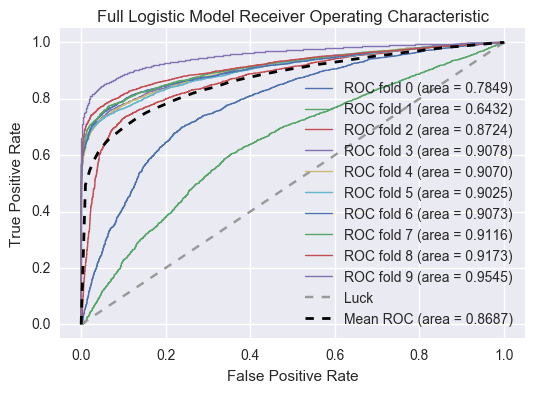

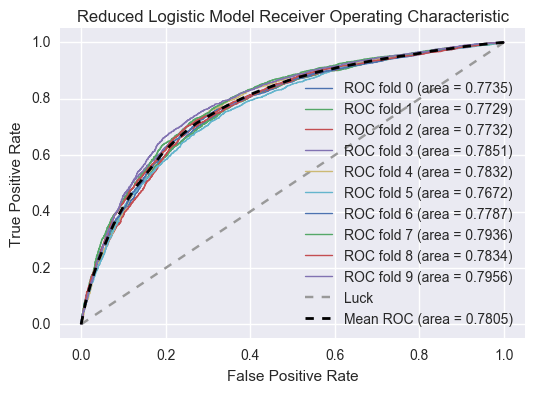

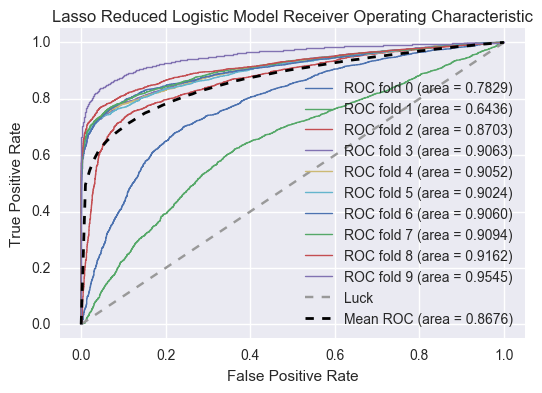

In [23]:
# Libraries import
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(target, n_folds=10)
classifier = logmodel

model_list = [data,reducedmodel_data,Lasso_reducedmodel_data]
model_names = ['Full Logistic Model','Reduced Logistic Model', 'Lasso Reduced Logistic Model']
    
for model, names in zip(model_list, model_names): 
    # Data generation
    X = model
    y = target
    n_samples, n_features = X.shape
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
           
    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.4f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.4f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    title = names + ' Receiver Operating Characteristic'
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()